In [4]:
%load_ext autoreload
%autoreload 2


In [5]:

import os

import matplotlib.pyplot as plt
import numpy as np
import dotenv

from tiled.client import from_uri

from tr_ap_xps.processor import XPSProcessor, Result
from tr_ap_xps.cli import listen

dotenv.load_dotenv()

client = from_uri("http://localhost:8000/api", api_key=os.getenv("TILED_SINGLE_USER_API_KEY"))
if client.get("runs") is None:
    client.create_container("runs")

# Run
(optional) Perform a "run" with random data. In a separate terminal, startup the labview simulator:

```
python -m tr_ap_xps.simulator
```

Now, start the processor in a terminal:

```
python -m tr_ap_xps.cli
```

In [2]:
import threading

import numpy as np
import zmq

from tr_ap_xps.processor import Result


def got_a_result(result):
    print(result)    
    plt.imshow(result.integrated_frame)
    plt.imshow(result.filtered_integrated_frame)
    plt.show()


def listen():
    while True:
        frame_info = socket.recv_json()
        integrated_frame = socket.recv()
        filtered_integrated_frame = socket.recv()
        shape = frame_info['shape']
        print(f"{shape=}")
        print(f"{tuple(shape)=}")
        np_integrated_frame = np.frombuffer(integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))
        np_integrated_filtered_frame = np.frombuffer(filtered_integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))
        got_a_result(
            Result(
                frame_info['frame_number'],
                np.frombuffer(np_integrated_frame),
                np.frombuffer(np_integrated_filtered_frame)))
        


ctx = zmq.Context()
socket = ctx.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5559")
socket.setsockopt(zmq.SUBSCRIBE, b"")

# Create and start a new thread for the listen function
listen_thread = threading.Thread(target=listen)
listen_thread.start()


Exception in thread Thread-4 (listen):
Traceback (most recent call last):
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_237514/1654708626.py", line 26, in listen
  File "/tmp/ipykernel_237514/1654708626.py", line 11, in got_a_result
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3476, in imshow
    __ret = gca().imshow(
            ^^^^^^^^^^^^^
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/matplotlib/__init__.py", line 1473, in inner
    return func(
           ^^^^^
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packa

shape=[1, 100]
tuple(shape)=(1, 100)
Result(frame_number=0, integrated_frame=array([1005.626, 1019.335, 1001.242, 1002.48 ,  974.181, 1013.157,
        997.804, 1006.143,  986.446, 1013.901, 1002.729, 1020.789,
        983.27 , 1009.276,  977.732, 1014.66 , 1000.733,  972.923,
        987.693,  990.083,  984.417,  972.425,  991.815,  999.517,
       1003.342, 1009.124,  992.663,  999.724, 1001.301,  976.455,
        985.484, 1030.093, 1014.893,  990.859,  986.21 , 1002.429,
       1016.1  ,  975.23 , 1011.709,  962.983, 1016.017,  976.626,
        986.85 ,  955.962,  997.005,  985.164,  994.324,  972.542,
        998.378,  982.649, 1008.54 ,  975.391, 1008.325, 1022.049,
        992.771, 1026.512, 1024.563,  992.079, 1003.38 , 1016.821,
        976.634,  988.401, 1007.044,  985.801, 1009.982, 1002.46 ,
        996.518, 1027.269, 1015.629,  978.547, 1011.097, 1001.726,
        984.489, 1001.212, 1038.528,  979.636,  978.155, 1015.275,
        955.509,  995.64 , 1008.252, 1002.787, 1017.

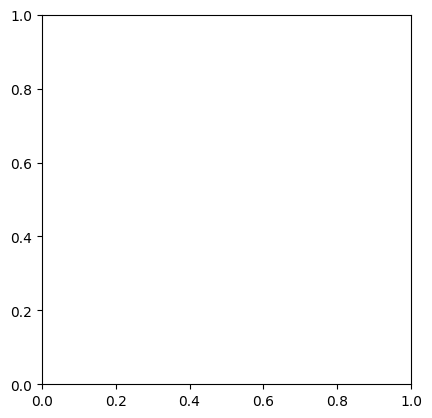

In [3]:
listen_thread.join()

In [12]:
np_integrated_filtered_frame = np.frombuffer(filtered_integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))

NameError: name 'filtered_integrated_frame' is not defined


# How long did it take?

We stored a table in Tiled for timing. We can see how long function calls took per frame.

In [ ]:
data = xps_dataset.timing_node.read()

for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(data[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
    plt.show()

plt.legend()
plt.show()


In [ ]:


plt.imshow(xps_dataset.lines_raw_node.read())
plt.colorbar()
plt.title('Horizontally integrated frames')
plt.show()


plt.imshow(xps_dataset.lines_filtered_node.read())
plt.colorbar()
plt.title('Horizontally integrated filtered frames')
plt.show()